<a href="https://colab.research.google.com/github/oujiSahar/TSF-GRIP-TASK2/blob/main/PridictionUnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK2 : predict the optimum number of clusters and represent it visually for the Iris dataset

## Data preparation

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
#importing and reading the dataset
Iris_df = datasets.load_iris()
Iris_df = pd.DataFrame(Iris_df.data, columns = Iris_df.feature_names)

In [4]:
# See the first 5 rows
Iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Explore the number of rows and collumns
Iris_df.shape

(150, 4)

In [6]:
#Checking the presence of null values
Iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Exploring Data 

### The Elbow method

In [9]:
#To find the optimal number of clusters
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(Iris_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182
5,6,39.066035
6,7,34.298230
7,8,30.014398
8,9,28.043838
9,10,26.306272


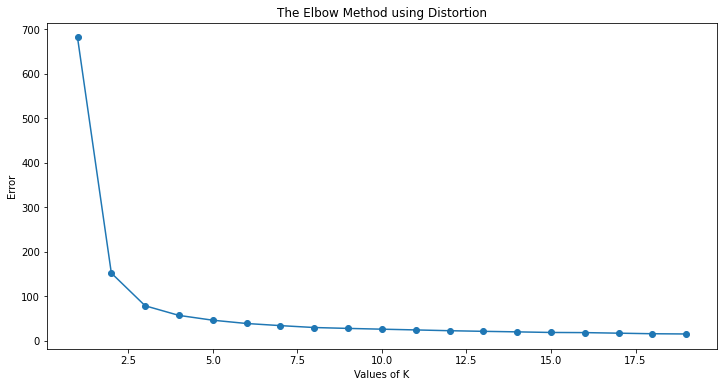

In [10]:
#Ploting elbow curve to find the number of clusters
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

From the above elbow curve we can say that 3 is the optimal number of clusters 

## Predictive Modeling

In [11]:
from sklearn.cluster import KMeans

x = Iris_df.iloc[:, [0, 1, 2, 3]].values


In [13]:
clusters = KMeans(n_clusters=3)
km_pred = clusters.fit_predict(x)
km_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
Iris_df['cluster'] = km_pred

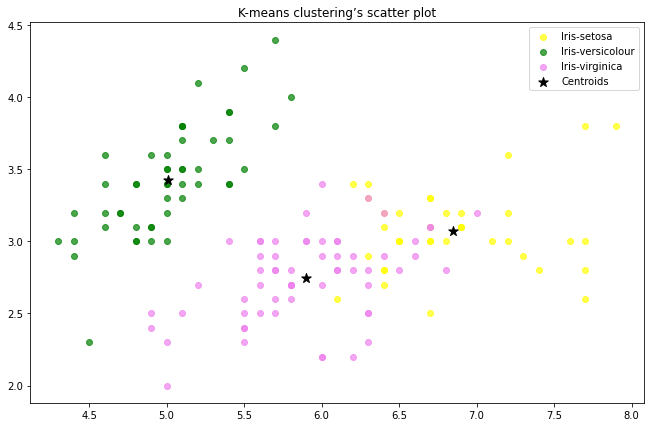

In [16]:
#visual of the final prediction
fig = plt.figure(1, figsize=(11, 7))
plt.scatter(x[km_pred == 0, 0], x[km_pred == 0, 1], alpha=0.7, label = 'Iris-setosa', color='yellow')
plt.scatter(x[km_pred == 1, 0], x[km_pred == 1, 1], alpha=0.7, label = 'Iris-versicolour', color='green')
plt.scatter(x[km_pred == 2, 0], x[km_pred == 2, 1], alpha=0.7, label = 'Iris-virginica', color='violet')
plt.title('K-means clustering’s scatter plot')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:,1], s = 100, marker='*', c='black', label = 'Centroids')

plt.legend()

# Conclusion

An insight we can get from the scatterplot is the model’s accuracy in determining Setosa and Virginica is comparatively more to Versicolour.